## Activity: AI based dynamics classification tool, exploiting processing of stabilogram images.
----
<font size = 4 > This repository is containing data analysis of sensor node attached to a dedicated mechanism shown in figure below for collecting postural sway data for the classification of the postural sway behaviour. </font>

----
### Explanation of the setup
Experimental surveys aimed to acquire the dataset have been performed by using the dedicated structure, shown in Fig. 1. This set-up allows for reproducing different dynamics, thus resembling the following movements: 

* **Stable behaviors (ST)**,
* **Antero-Posterior (AP)**, 
* **Medio-Lateral (ML) dynamics**,  
* **Unstable behaviors (UNST)**. 

The sensor node is located on the structure in a position corresponding to the user chest, where H1 is the distance between the sensor node and the bottom joint (on the floor), while H2 is the distance between the node and the belt joint. ML displacements are obtained by manually tilting the system around the belt joint, while APs are generated by exploiting tilting around the bottom joint. 

<font size=4> The sensor setup is depicted in the picture below.</font>

<center> <img src=./img/data-collection-setup.png width=300 height=600> </center>

### Data
<font size = 4 > Data contains extracted features from the accelerometer data sampled at 100Hz . Two features are extracted from the data namely Antero-Posterior Displacement (DAP) and Medio-Lateral displacement (DML).
Starting from three acceleration components, time evolutions of the Antero-Posterior and Medio-Lateral displacement (DAP and DML) have been estimated by the following relationships  
</font> 

$$ DAP = H_1{ A_z\over \sqrt{{A_y}^2+{A_x}^2}} $$
$$ DML = H_2{ A_x\over \sqrt{{A_y}^2+{A_z}^2}} $$
H<sub>1</sub> and H<sub>2</sub> are the distance between the sensor node and the bottom joint (on the floor) and the belt joint respectively.


The dataset is organized as follows:
* In each folder Case_x you can find the time evolution of [DAP DML] for several examples of Standing, AP, ML, Unstable dynamics, obtained by the above-described set-up. 
* Each case represents a different positioning of the sensor node (different heights H1 and H2).


 <font size=4>  <b>Quick Note</b> </font>
 
Plotting DAP against DML you can find the stabilogram for each dynamic, and then you can save as images to be used for training and testing AI classification tool.
If you prefer stabilograms centered around zero DAP-DML values, you have just to remove the mean value from time-series.

## Initial analysis of the data: Read, find minimum length etc.

In [2]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']
width = 600
input_data = np.array([])
output_data = np.array([])
min_len = 1000000
min_file_name = ''
for filename in glob.iglob('./data/**/**/*.txt', recursive=True):
    temp_data = np.loadtxt(filename)
    len_data = len(temp_data)
    if(len_data < min_len):
        min_len = len_data
        min_file_name = filename
    if classes[0] in filename:
        stab_standing = temp_data
    if classes[1] in filename:
        stab_ap = temp_data
    if classes[2] in filename:
        stab_ml = temp_data
    if classes[3] in filename:
        stab_instabile = temp_data


print(min_len)
print(min_file_name)

455
./data/Case_5/Stabilogram/Stab_AP11.txt


## Read data and structure it in a numpy array

In [30]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((2,min_len))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/**/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0,0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1,1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2,2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3,3])
    # pd.concat([df, df_temp], axis=1)
    temp_data = np.transpose(temp_data)
    input_data = np.append(input_data, temp_data,axis=0)
input_data = np.delete(input_data, [0,1], axis=0)
print(f"Input data shape in Case_1 {input_data.shape}")
print(f"Output data shape in Case_1 {output_data.shape}")

Input data shape in Case_1 (6000, 450)
Output data shape in Case_1 (6000,)


## Plot Stabilograms - Scatter Plot

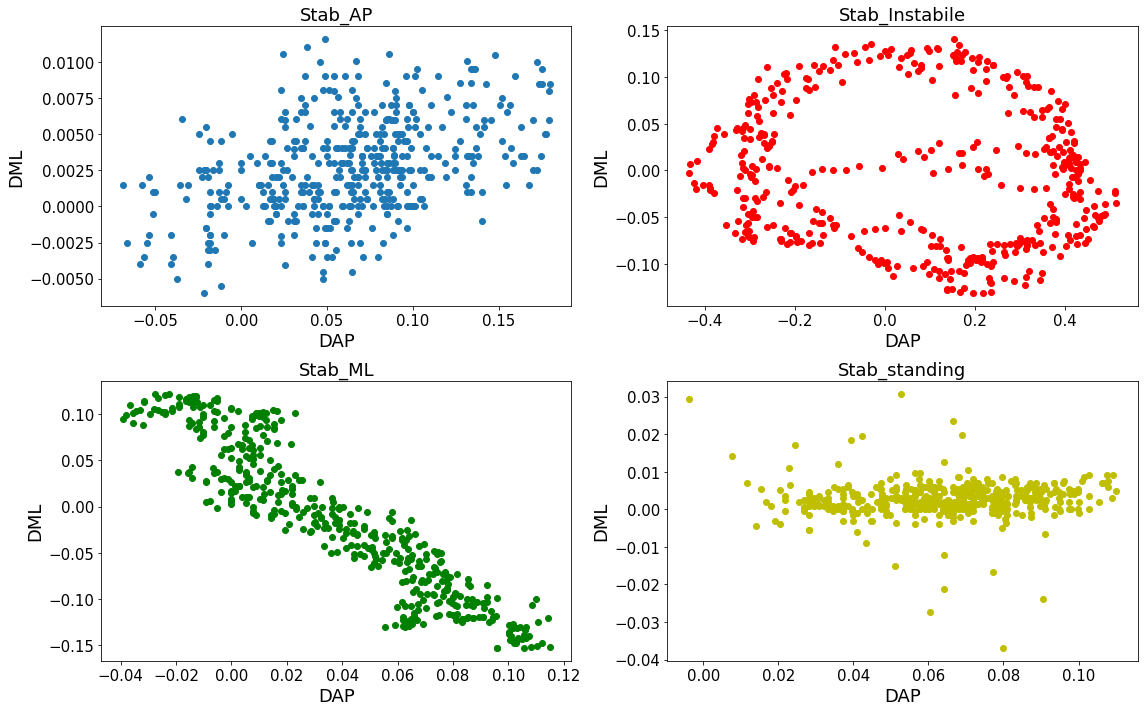

In [4]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].scatter(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=18)
axs[0,0].set_xlabel('DAP', fontsize=18)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].scatter(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].scatter(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Plot Stabilograms - Line Plot

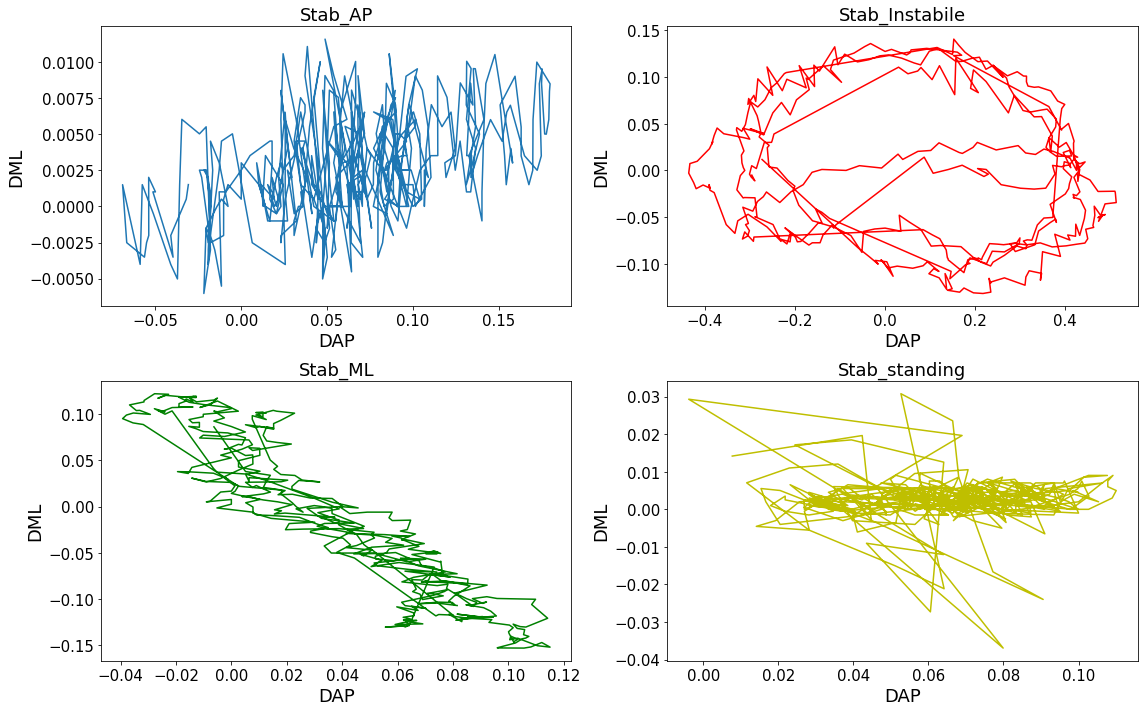

In [6]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=18)
axs[0,0].set_xlabel('DAP', fontsize=18)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].plot(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].plot(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].plot(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Concatenate data and plot 

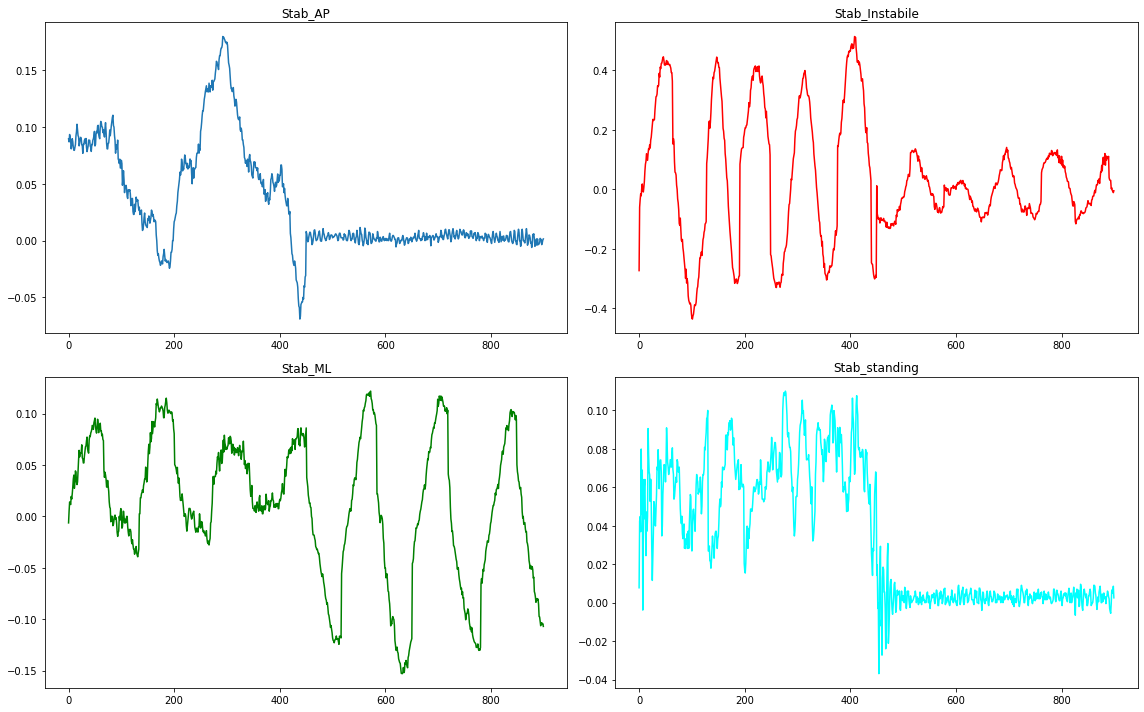

In [7]:
test_stab = np.concatenate((stab_ap[:,0],stab_ap[:,1]), axis=0)
test_ml = np.concatenate((stab_ml[:,0],stab_ml[:,1]), axis=0)
test_instabile = np.concatenate((stab_instabile[:,0],stab_instabile[:,1]), axis=0)
test_standing = np.concatenate((stab_standing[:,0],stab_standing[:,1]), axis=0)
# %matplotlib
fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(test_stab)
axs[0, 0].set_title('Stab_AP')
axs[0, 1].plot(test_instabile, c='r')
axs[0, 1].set_title('Stab_Instabile')
axs[1, 0].plot(test_ml, c='g')
axs[1, 0].set_title('Stab_ML')
axs[1, 1].plot(test_standing, c='cyan')
axs[1, 1].set_title('Stab_standing')
plt.tight_layout()

## Seperataly Plot DAP-DML for each dynamic

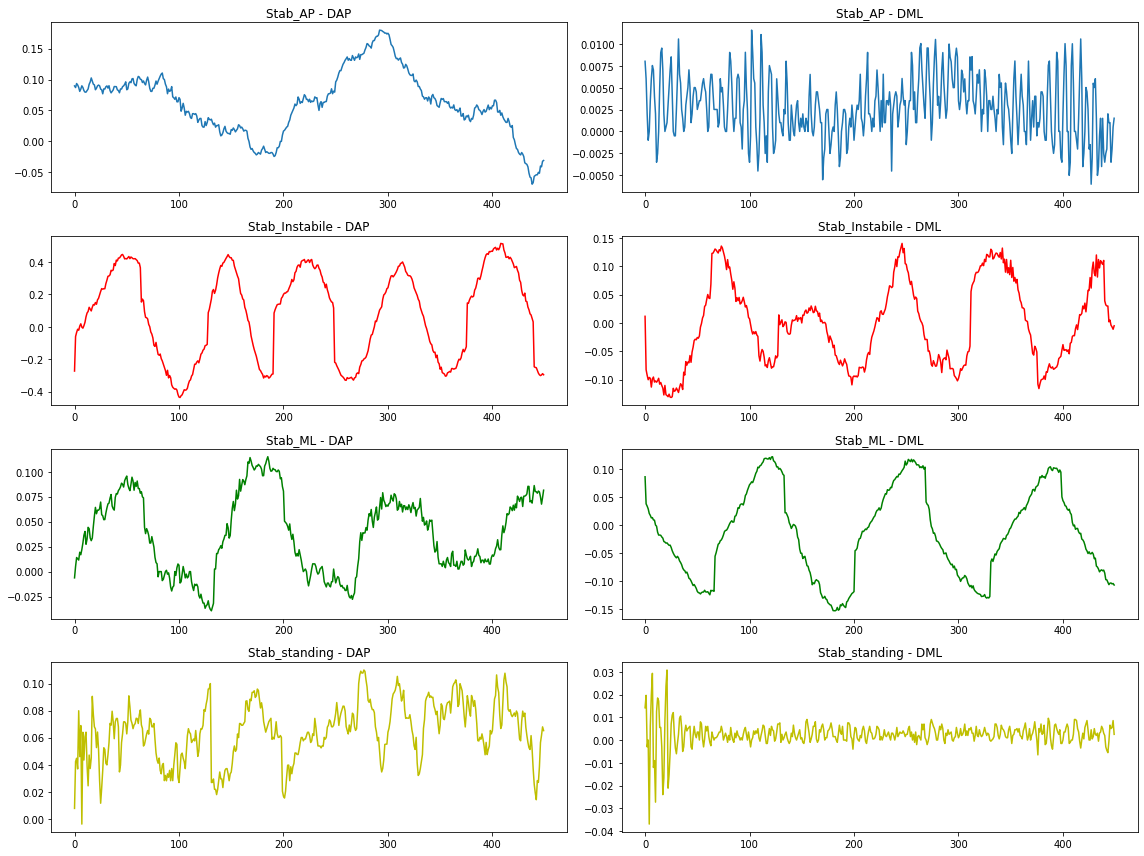

In [9]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(4, 2, figsize=(16,12))
axs[0, 0].plot(stab_ap[:,0])
axs[0, 0].set_title('Stab_AP - DAP')

axs[0,1].plot(stab_ap[:,1])
axs[0,1].set_title('Stab_AP - DML')

axs[1, 0].plot(stab_instabile[:,0], c='r')
axs[1, 0].set_title('Stab_Instabile - DAP')

axs[1,1].plot(stab_instabile[:,1], c='r')
axs[1,1].set_title('Stab_Instabile - DML')

axs[2, 0].plot(stab_ml[:,0], c='g')
axs[2, 0].set_title('Stab_ML - DAP')

axs[2,1].plot(stab_ml[:,1], c='g')
axs[2,1].set_title('Stab_ML - DML')

axs[3, 0].plot(stab_standing[:,0], c='y')
axs[3, 0].set_title('Stab_standing - DAP')

axs[3,1].plot(stab_standing[:,1], c='y')
axs[3,1].set_title('Stab_standing - DML')
plt.tight_layout()

## Scatter Plot all dynamics in one plot

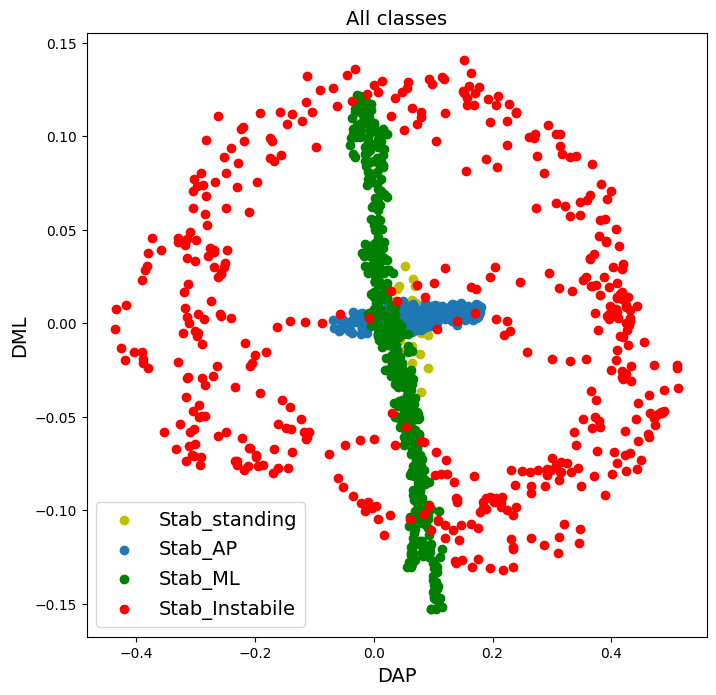

In [11]:
# Plot 2x2 subplots
# %matplotlib
fig = plt.figure(figsize=(8,8), dpi=100)
plt.scatter(stab_standing[:,0], stab_standing[:,1], c='y')
plt.scatter(stab_ap[:,0], stab_ap[:,1])
plt.scatter(stab_ml[:,0], stab_ml[:,1], c='g')
plt.scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
plt.legend(classes, fontsize=14)
plt.title('All classes', fontsize=14)
plt.xlabel('DAP', fontsize=14)
plt.ylabel('DML', fontsize=14)
plt.show()

## Line plot all dynamics in one plot

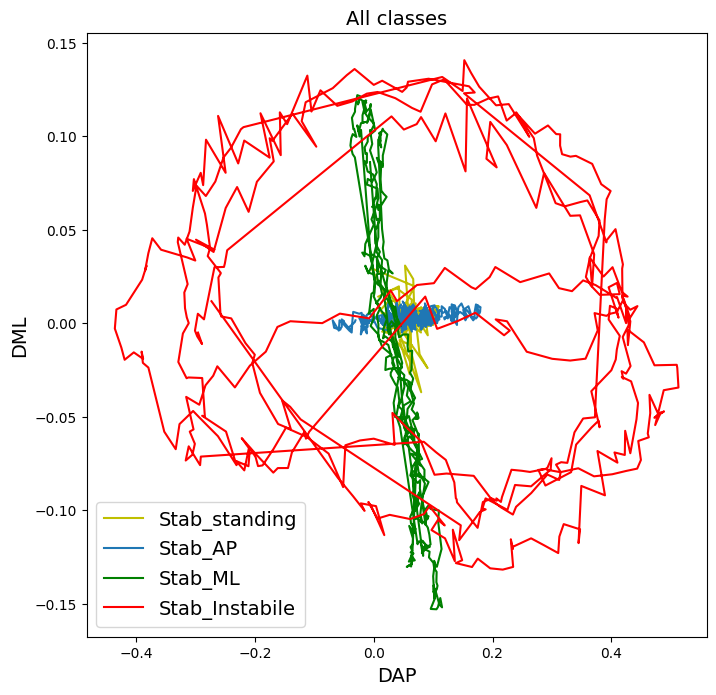

In [12]:
# Plot 2x2 subplots
# %matplotlib
fig = plt.figure(figsize=(8,8), dpi=100)
plt.plot(stab_standing[:,0], stab_standing[:,1], c='y')
plt.plot(stab_ap[:,0], stab_ap[:,1])
plt.plot(stab_ml[:,0], stab_ml[:,1], c='g')
plt.plot(stab_instabile[:,0], stab_instabile[:,1], c='r')
plt.legend(classes, fontsize=14)
plt.title('All classes', fontsize=14)
plt.xlabel('DAP', fontsize=14)
plt.ylabel('DML', fontsize=14)
plt.show()

## Import libraries for training and select GPU

In [14]:
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib

# Using GPU
import os
import scipy.io as scpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


## Structure data for training, test and validation
    Here the dataset is structured in way that both DAP and DML are considered as different inputs.
    This is the first method.

In [32]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (4200, 900, 900)
 (4200, 900, 900)


## Try a simple dense model

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 12)                5412      
                                                                 
 dense_35 (Dense)            (None, 4)                 52        
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
Total params: 5,484
Trainable params: 5,484
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
132/132 [==============================] - 0s 1ms/step - loss: 1.2227 - accuracy: 0.4748 - val_loss: 1.1230 - val_accuracy: 0.5067
Epoch 2/400
132/132 [==============================] - 0s 956us/step - loss: 1.0518 - accuracy: 0.5507 - val_loss: 0.9938 - val_accuracy: 0.5833
Epoch 3/400
132/132 [======

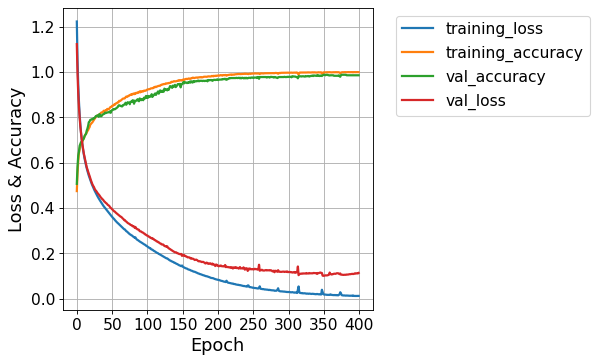

In [39]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(450,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=400,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [40]:
dense_model.evaluate(x_test, y_test, verbose=1)

29/29 [==============================] - 0s 721us/step - loss: 0.1752 - accuracy: 0.9833


[0.17523813247680664, 0.9833333492279053]

## Try the CNN Model with 1D Convolution

Model: "conv_model_paper"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 444, 32)           256       
                                                                 
 batch_normalization_6 (Batc  (None, 444, 32)          128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 444, 32)           0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 55, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 51, 48)            7728      
                                                                 
 batch_normalization_7 (Batc  (None, 51, 48)      

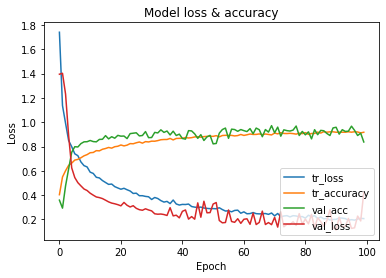

In [45]:
model = tf.keras.Sequential(name='conv_model_paper')
model.add(tf.keras.layers.InputLayer(input_shape=(450,1)))
model.add(tf.keras.layers.Conv1D(32,7))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
model.add(tf.keras.layers.Conv1D(48,5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val,y_val), verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

In [ ]:
import collections
import pathlib

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import tensorflow_text as tf_text

In [5]:
batch_size = 32
seed = 42
root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/Case_1/'
train_dir = pathlib.Path(root_dir)
raw_train_ds = utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 200 files belonging to 1 classes.
Using 160 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(10):
    print("Question: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])

In [7]:
for i, label in enumerate(raw_train_ds.class_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to Stabilogram
